<a href="https://colab.research.google.com/github/nannthd/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html
อยากให้ค่าของ data อยู่ในมาตรฐานและScaleเดียวกัน

In [35]:
import pandas as pd

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ใช้ data กรมอุตุ

In [37]:
weather_data = pd.read_csv('/content/drive/MyDrive/Data Prep and Data Mining BSc65/อุตุ/Group3_ณัฐธิดา_ศุภัสรา_เฉลิมเกียรติ_พิทวัส.csv')
weather_data.head()

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,22.8,25.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,23.1,24.3,2011-10-05


In [38]:
weather_data.shape

(8169, 13)

In [39]:
data_features = weather_data.iloc[:,4:-1]
data_features.head()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,1007.49,86,3,10,3,22.9,22.1,25.6
3,1008.28,80,2,8,0,21.9,22.8,25.8
4,1009.88,86,2,10,2.2,21.7,23.1,24.3


In [40]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [41]:
data_features.dtypes #มีแบบที่เป็น object

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
อุณหภูมิตุ้มแห้ง      float64
dtype: object

In [42]:
# data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int) ทำไม่ได้เพราะมี - อยู่

In [43]:
data_features[data_features.eq('-').any(1)] # เลือกค่าที่ต้องการมาดูทุกๆ คอลัมน์

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
305,1009.88,78,4,4,-,23.5,24.3,27.9
306,1009.47,73,2,2,-,21.9,23.7,27.5
307,1008.08,69,3,3,-,20.7,22.5,27.3
308,1008.35,72,5,5,-,21.3,22.8,27.1
309,1009.30,72,2,2,-,21.3,23.5,27.0
...,...,...,...,...,...,...,...,...
8086,1016.96,62,2,-,0,13.4,14.8,21.6
8092,1014.85,69,2,-,0,15.9,16.2,22.3
8093,1012.80,66,1,-,0,15.8,16.5,23.3
8117,1014.94,68,2,-,0,17.4,17.8,24.2


In [44]:
weather_data[weather_data['ความเร็วลม'].eq('0')] # แทนด้วย0ไม่ได้ เพราะความหมายจะเปลี่ยน มีdataที่เป็น0อยู่

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
185,ขอนแก่น,3,11,2012,1010.47,67,0,2,0,19.3,21.2,26.7,2012-11-03
757,ขอนแก่น,1,10,2016,1008.89,91,0,0,24,24.3,24.0,26.0,2016-10-01
1065,ขอนแก่น,7,10,2018,1011.61,69,0,0,-,20.9,23.1,27.6,2018-10-07
1083,ขอนแก่น,25,10,2018,1012.58,79,0,0,-,24.0,24.4,28.3,2018-10-25
1100,ขอนแก่น,11,11,2018,1012.06,76,0,0,-,22.6,24.0,27.7,2018-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,สกลนคร,11,12,2016,1011.73,73,0,5,-,16.6,16.4,21.9,2016-12-11
5670,สกลนคร,12,12,2016,1009.92,73,0,4,-,19.2,19.1,25.0,2016-12-12
5677,สกลนคร,19,12,2016,1013.55,72,0,0,-,18.8,18.3,24.7,2016-12-19
6675,หนองคาย,19,10,2012,1012.33,69,0,1,0,22.2,23.7,29.0,2012-10-19


In [ ]:
weather_data[weather_data['ความเร็วลม'].eq('-')] # เลือกมาเฉพาะคอลัมน์

In [46]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
305,ขอนแก่น,3,10,2013,1009.88,78,4,4,-,23.5,24.3,27.9,2013-10-03
306,ขอนแก่น,4,10,2013,1009.47,73,2,2,-,21.9,23.7,27.5,2013-10-04
307,ขอนแก่น,5,10,2013,1008.08,69,3,3,-,20.7,22.5,27.3,2013-10-05
308,ขอนแก่น,6,10,2013,1008.35,72,5,5,-,21.3,22.8,27.1,2013-10-06
309,ขอนแก่น,7,10,2013,1009.30,72,2,2,-,21.3,23.5,27.0,2013-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,หนองคาย,8,12,2021,1016.96,62,2,-,0,13.4,14.8,21.6,2021-12-08
8092,หนองคาย,14,12,2021,1014.85,69,2,-,0,15.9,16.2,22.3,2021-12-14
8093,หนองคาย,15,12,2021,1012.80,66,1,-,0,15.8,16.5,23.3,2021-12-15
8117,หนองคาย,8,1,2022,1014.94,68,2,-,0,17.4,17.8,24.2,2022-01-08


In [47]:
weather_data[weather_data.eq('T').any(1)]

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
24,ขอนแก่น,25,10,2011,1011.34,73,5,5,T,21.8,22.7,27.4,2011-10-25
102,ขอนแก่น,11,1,2012,1016.16,59,6,7,T,14.2,19.0,22.9,2012-01-11
121,ขอนแก่น,30,1,2012,1012.34,67,4,10,T,18.7,21.6,25.3,2012-01-30
125,ขอนแก่น,3,2,2012,1013.61,71,3,8,T,19.5,20.9,25.3,2012-02-03
155,ขอนแก่น,4,10,2012,1007.07,81,2,7,T,24.1,24.2,27.9,2012-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,สกลนคร,26,12,2021,1016.34,74,2,5,T,18.7,19.8,23.9,2021-12-26
6521,หนองคาย,17,10,2011,1013.64,77,3,10,T,19.3,22.0,23.6,2011-10-17
7874,หนองคาย,8,10,2020,1008.57,78,2,4,T,21.6,24.3,26.0,2020-10-08
7891,หนองคาย,25,10,2020,1010.69,68,2,3,T,19.4,20.0,26.1,2020-10-25


In [54]:
newdata_features = data_features[data_features.eq('-').any(1) == False]
newdata_features.shape

(5208, 8)

In [55]:
newdata_features = newdata_features[newdata_features.eq('T').any(1) == False]
newdata_features.shape

(5061, 8)

In [56]:
newdata_features['ความเร็วลม'] = newdata_features['ความเร็วลม'].astype(float) 
newdata_features['จำนวนเมฆ'] = newdata_features['จำนวนเมฆ'].astype(float) 
newdata_features['ปริมาณฝน'] = newdata_features['ปริมาณฝน'].astype(float) 
newdata_features['อุณหภูมิต่ำสุด'] = newdata_features['อุณหภูมิต่ำสุด'].astype(float) 

In [57]:
newdata_features.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.420944,19.933570,25.002667
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.630472,3.295887,2.720534
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,6.800000,11.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,17.900000,23.500000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,20.300000,25.400000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.200000,22.500000,26.900000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,28.400000,26.700000,31.000000


In [78]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,6]

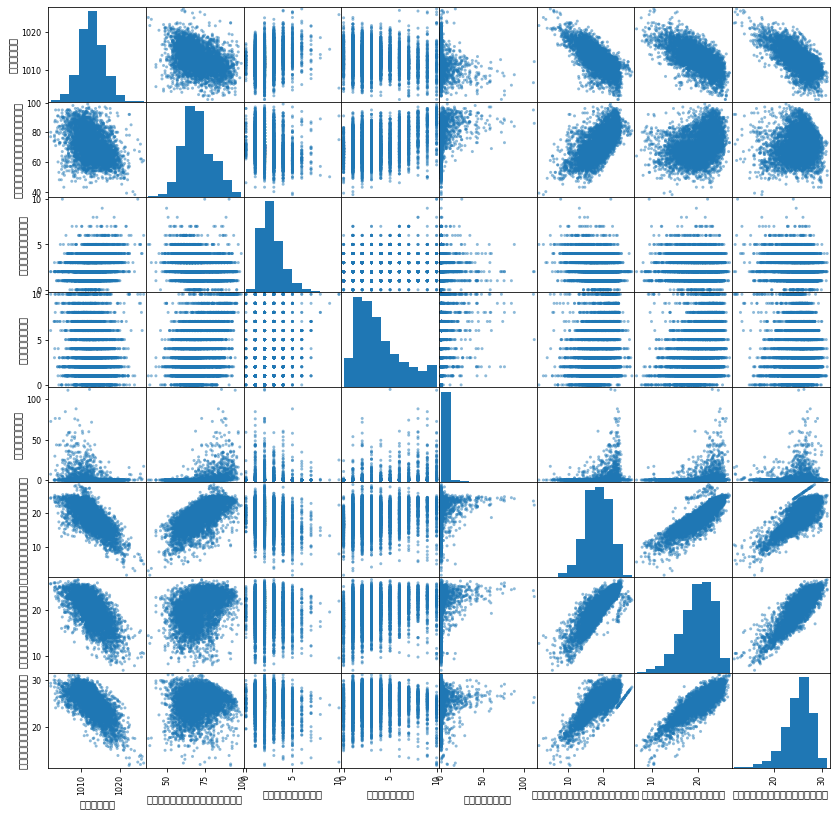

In [60]:
pd.plotting.scatter_matrix(newdata_features);

In [62]:
from matplotlib import pyplot as plt

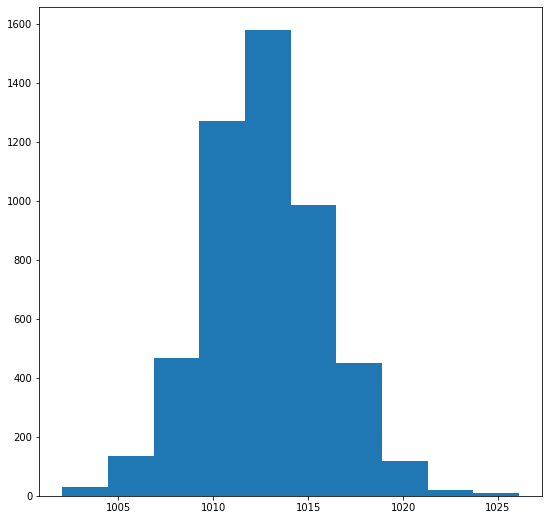

In [65]:
plt.hist(newdata_features['ความกด']);

*   ปรับ mean ให้เป็น 0 
*   ปรับ standard deviation ให้เป็น 1 

### StandardScaler

In [66]:
from sklearn import preprocessing

In [70]:
# define
scaler = preprocessing.StandardScaler() # ในวงเล็บคือ parameter
# train (สร้าง model)
scaler.fit(newdata_features)
# predict
newdata_features_s = scaler.transform(newdata_features)

In [71]:
newdata_features_s

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.59197655,
         1.47666181,  0.95480871],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.53688186,
         0.93047261,  0.21958617],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.65737801,  0.21958617],
       ...,
       [ 1.25024518, -0.57652221, -1.06226641, ..., -0.88728479,
        -1.49703494, -0.8464865 ],
       [ 0.81647046, -0.89455937, -0.23542385, ..., -0.7220007 ,
        -0.73843883, -0.44211411],
       [ 0.10406672, -0.57652221, -0.23542385, ..., -0.17105374,
        -0.28328116,  0.14606392]])

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([-3.3851285 , -2.62333143, -1.86153436, -1.09973729, -0.33794022,
         0.42385684,  1.18565391,  1.94745098,  2.70924805,  3.47104512,
         4.23284218]),
 <a list of 10 Patch objects>)

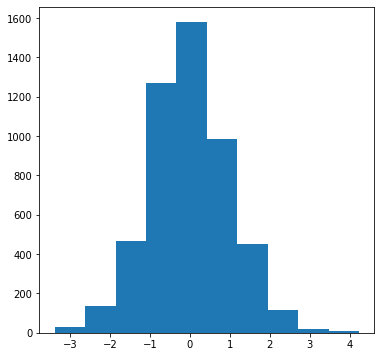

In [74]:
plt.hist(newdata_features_s[:,0]) #data ในsklearn เป็น numpy array

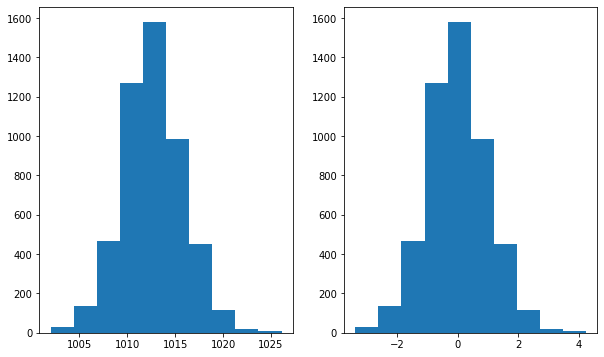

In [79]:
plt.subplot(1,2,1)
plt.hist(newdata_features['ความกด'])
plt.subplot(1,2,2)
plt.hist(newdata_features_s[:,0]);

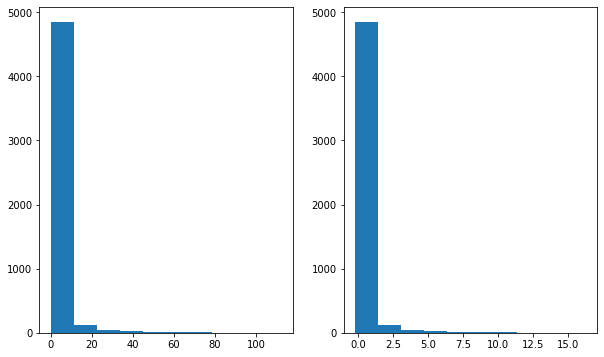

In [81]:
plt.subplot(1,2,1)
plt.hist(newdata_features['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(newdata_features_s[:,4]);

### Min-Max Normalization

In [82]:
# define
scaler = preprocessing.MinMaxScaler() # ในวงเล็บคือ parameter
# train (สร้าง model)
scaler.fit(newdata_features)
# predict
newdata_features_s_norm = scaler.transform(newdata_features)

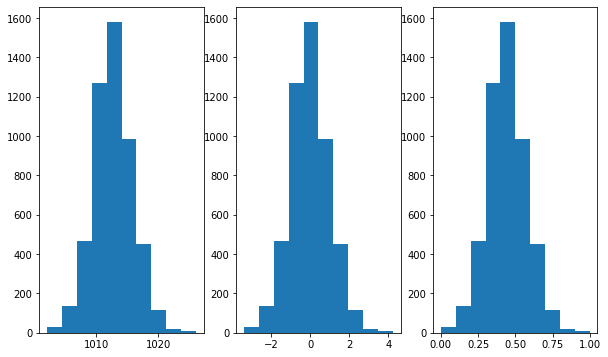

In [88]:
plt.subplot(1,3,1)
plt.hist(newdata_features['ความกด'])
plt.subplot(1,3,2)
plt.hist(newdata_features_s[:,0]);
plt.subplot(1,3,3)
plt.hist(newdata_features_s_norm[:,0]); # การกระจายของข้อมูลจะอยู่ที่ 0-1

# Discretization

## ใช้ data บ้าน (ของแต่ละคน)

In [109]:
home_data = pd.read_csv('/content/drive/MyDrive/Data Prep and Data Mining BSc65/ณัฐธิดา สรึมงาม.csv')
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [110]:
home_data.shape

(100, 22)

### ลบ record ที่ค่า sell price เป็นค่าว่าง

In [111]:
home_data.isnull().any() # sell_price ไม่มี missing แต่ก็ควรทำ

post_id               False
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom     False
number_of_bathroom     True
direction             False
furniture             False
usable_area           False
number_of_parking     False
project_name           True
district              False
zone                   True
street                 True
sell_price            False
d250-7/11             False
d500-7/11             False
d750-7/11             False
d1000-7/11            False
d1250-7/11            False
d1500-7/11            False
dtype: bool

In [112]:
home_data = home_data.dropna(subset=['sell_price'])

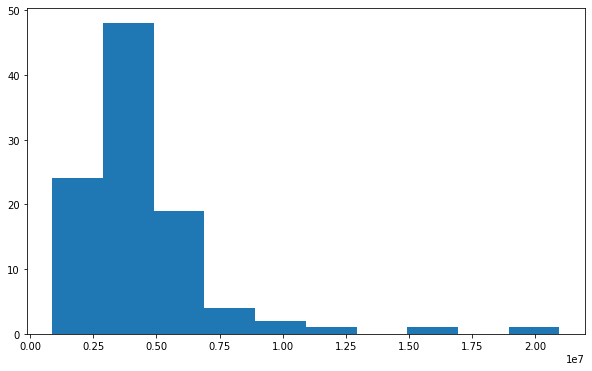

In [113]:
plt.hist(home_data['sell_price']); # data ส่วนมากต่ำกว่า5แสน มี5แสนถึง1ล้าน และ1ล้านขึ้นไป 

### แปลงค่า sell_price 
- ราคาที่ต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m-10m ให้เป็น 2 
- ราคา 10m ขึ้นไป ให้เป็น 3



In [ ]:
#ไปลองศึกษาเพิ่มจากในเน็ตและของเพื่อนที่อาจารย์ commit

# One-hot-Encoder

In [115]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [117]:
home_data_dummies #แตก zone ออกมาเป็นย่อยๆ

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
